<a href="https://www.kaggle.com/code/jlcordoba/uw-madison-gi-track-data-analysis?scriptVersionId=97399728" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ****Please, vote up if you find the code useful :D ****

In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt
import seaborn as sns

import os

from matplotlib import pyplot as plt

from skimage import io
from skimage.color import rgb2gray
import math

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_metadata = pd.read_csv('../input/../input/uw-madison-gi-tract-image-segmentation/train.csv')
test = pd.read_csv('../input/../input/uw-madison-gi-tract-image-segmentation/sample_submission.csv')


In [3]:
df_test = pd.DataFrame(test)

df_train = pd.DataFrame(train_metadata)

In [4]:
len(df_train)

115488

In [5]:
df_train

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN
...,...,...,...
115483,case30_day0_slice_0143,small_bowel,NaN
115484,case30_day0_slice_0143,stomach,NaN
115485,case30_day0_slice_0144,large_bowel,NaN
115486,case30_day0_slice_0144,small_bowel,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


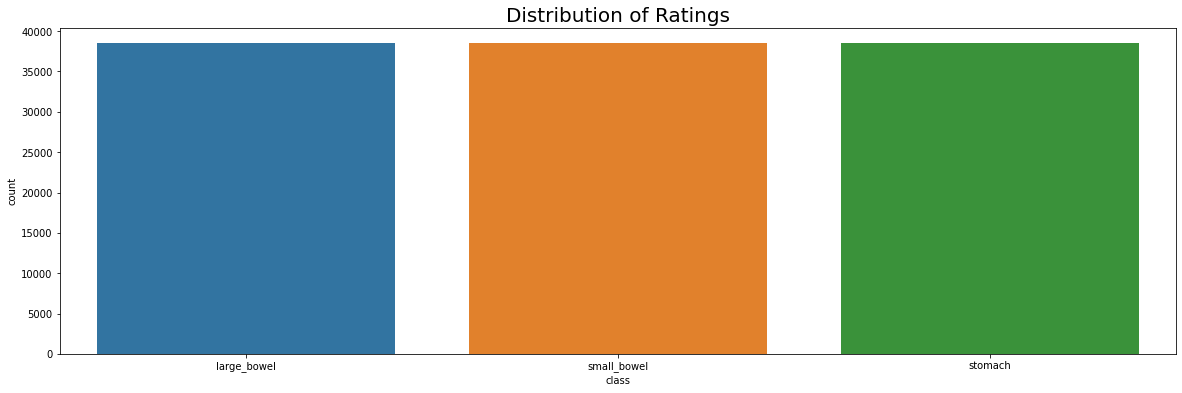

In [6]:
plt.figure(figsize=(20, 6))

sns.countplot(df_train['class'])
plt.title("Distribution of Ratings", fontsize=20)

plt.show()

In [7]:
type(df_train['segmentation'][0])

float

In [8]:
clase = []
segmentation = []
ide = []
for i in range(len(df_train)):
    try:
        math.isnan(df_train['segmentation'][i])
    except:
        clase.append(df_train['class'][i])
        segmentation.append(df_train['segmentation'][i].split())
        ide.append(df_train['id'][i])

    


In [9]:
ide[0:2]

['case123_day20_slice_0065', 'case123_day20_slice_0066']

In [10]:
segmentation[:2]

[['28094',
  '3',
  '28358',
  '7',
  '28623',
  '9',
  '28889',
  '9',
  '29155',
  '9',
  '29421',
  '9',
  '29687',
  '9',
  '29953',
  '9',
  '30219',
  '9',
  '30484',
  '10',
  '30750',
  '10',
  '31016',
  '10',
  '31282',
  '10',
  '31548',
  '10',
  '31814',
  '10',
  '32081',
  '9',
  '32347',
  '8',
  '32614',
  '6'],
 ['27561',
  '8',
  '27825',
  '11',
  '28090',
  '13',
  '28355',
  '14',
  '28620',
  '15',
  '28886',
  '15',
  '29151',
  '17',
  '29417',
  '17',
  '29682',
  '18',
  '29948',
  '18',
  '30214',
  '18',
  '30480',
  '18',
  '30746',
  '18',
  '31012',
  '18',
  '31278',
  '18',
  '31544',
  '18',
  '31811',
  '17',
  '32077',
  '17',
  '32344',
  '15',
  '32610',
  '15',
  '32877',
  '13',
  '33144',
  '11',
  '33411',
  '8']]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


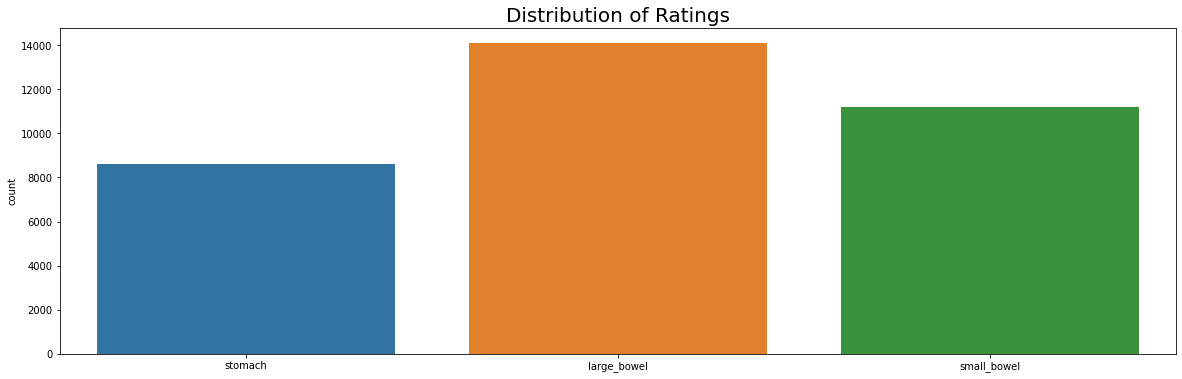

In [11]:
plt.figure(figsize=(20, 6))

sns.countplot(clase)
plt.title("Distribution of Ratings", fontsize=20)

plt.show()

In [12]:
directory = '../input/uw-madison-gi-tract-image-segmentation/train/case123/case123_day20/scans/slice_0063_266_266_1.50_1.50.png'

[[ 0 19 19 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


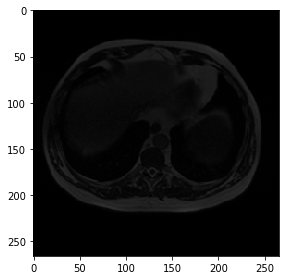

In [13]:
io.imshow(directory) #image in the screen
image_0 = io.imread(directory) #image to array
print(image_0)


In [14]:
image_0

array([[ 0, 19, 19, ...,  0,  0,  0],
       [ 0,  0, 19, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint16)

In [15]:
import numpy as np
from PIL import Image

img = Image.open(directory)
array = np.array(img)

array = 255 - array

invimg = Image.fromarray(array)
invimg.save('testgrey-inverted.png')

We can manipulate the image data and write it back out to a file

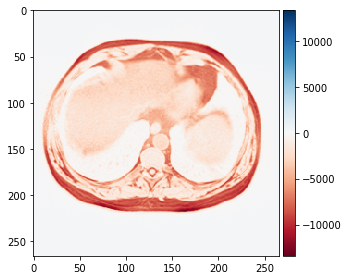

In [16]:
io.imshow(array)

In [17]:
np.zeros((266,266))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

An array of zeros is created to add the pixels of the marks and to finally add the result to the image we have

# **Working in progress :D**